# Linear regression and gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
k = 3
b = 7

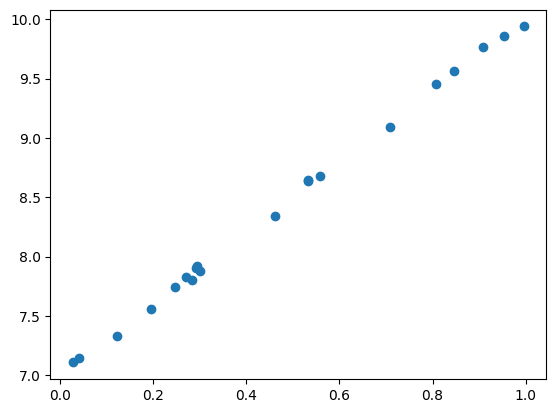

In [2]:
m = 20 # Number of data points
x = 1 * np.random.rand(m)

A = 0.1 # Amplitude of noise
noise = A * np.random.rand(m) - A/2
y = k * x + b + noise
plt.scatter(x,y)
plt.show()

## Use gradient descent to find the linear fit

Given an input vector ${x}^{(i)}$ with $n$ features, the hypothesis:
$$h(x^{(i)}) = \sum_{j=0}^n \theta_j x_j^{(i)} $$
where $x_0^{(i)}$ is defined to be 1. The cost function is:
$$J(\theta) = \frac{1}{2} \sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^2$$

The $j_{th}$ component of the gradient:

$$\frac{\partial}{\partial \theta_j} J(\theta) = \sum_{i=1}^m (h(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

So the gradient descent update rule is:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) = \theta_j - \alpha \sum_{i=1}^m (h(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

When actually implementing it, it is helpful to write in a matrix form:

$$ \theta := \theta - \alpha \nabla_\theta J(\theta)$$

where 

$$\nabla_\theta J(\theta) = X^T(X\Theta - Y)$$

where $X$ is a $m$ (number of training examples) by $n+1$ (number of features) matrix, $\Theta$ and $Y$ are both $n$ by 1 vectors.

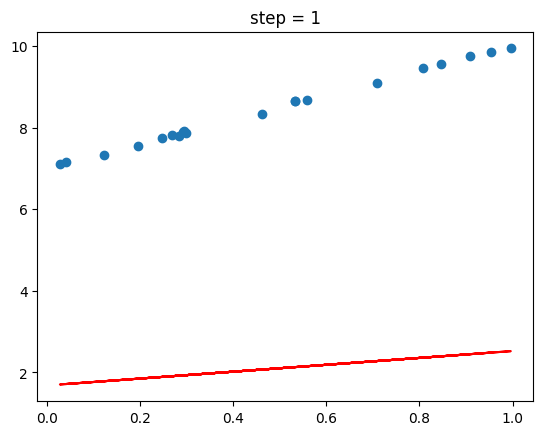

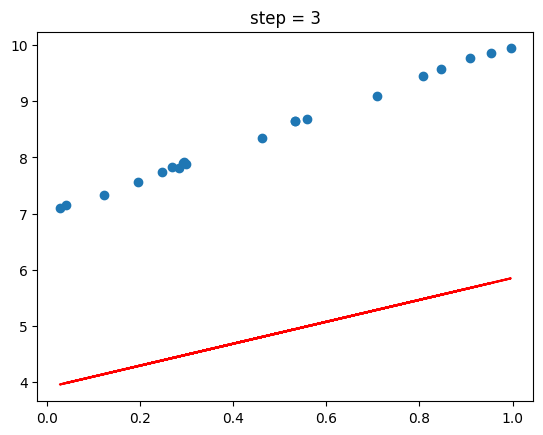

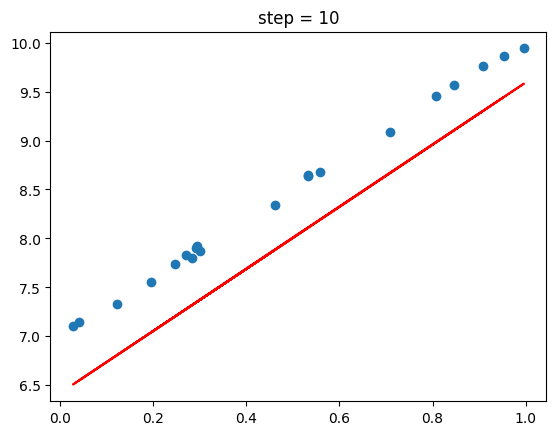

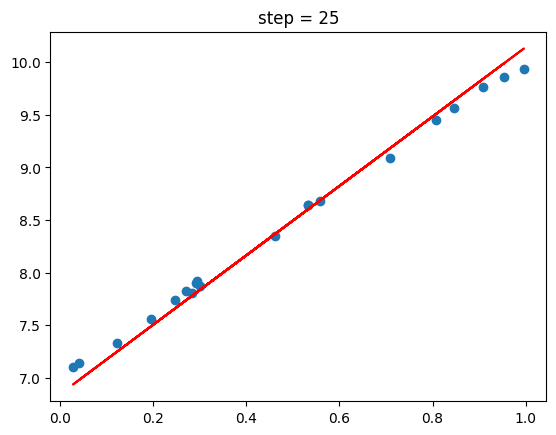

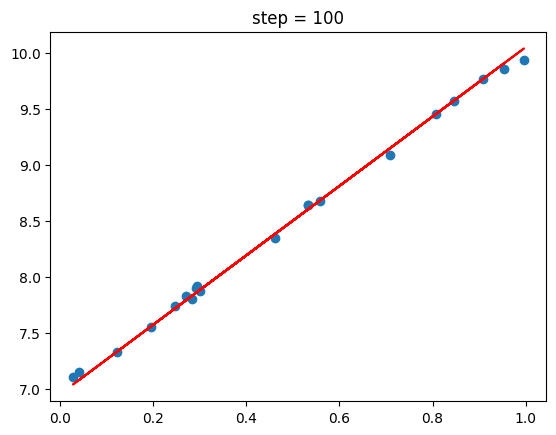

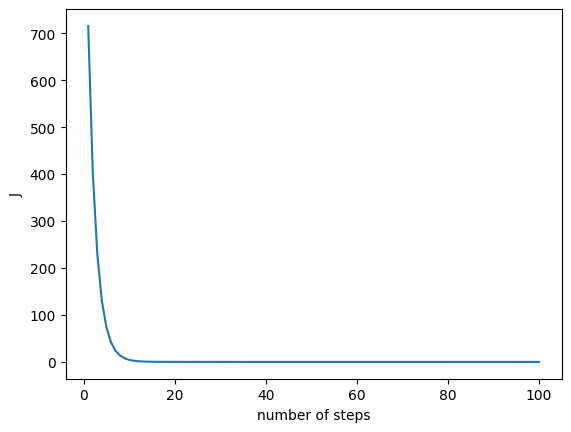

In [3]:
X = np.hstack((np.ones(m).reshape(m,1),x.reshape(m,1)))
alpha = 0.01
nsteps = 100
theta = np.array([0,0])

plot_steps = [1,3,10,25,100]

nsteps = 100
steps = list(range(1,1+nsteps))
J = []

for step in steps:
    h = X @ theta
    J.append((h - y) @ (h - y) / 2)
    gradient = X.transpose() @ (h - y)
    theta = theta - alpha * gradient
    # potentially plot 
    if step in plot_steps:
        plt.scatter(x,y)
        y_predict = X @ theta
        plt.plot(x, y_predict,'r')
        plt.title('step = ' + str(step))
        plt.show()

plt.plot(steps, J)
plt.xlabel('number of steps')
plt.ylabel('J')
plt.show()

By setting the gradient to 0, we get the normal equation:

$$\Theta = (X^TX)^{-1} X^TY $$

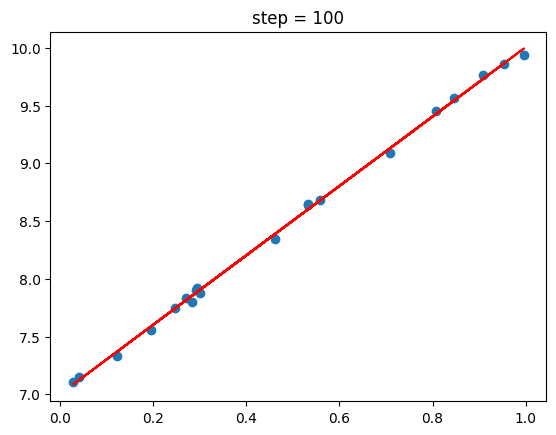

In [4]:
XT = X.transpose()
theta_normal = np.linalg.inv(XT @ X) @ XT @ y

plt.scatter(x,y)
y_predict = X @ theta_normal
plt.plot(x, y_predict,'r')
plt.title('step = ' + str(step))
plt.show()

# Stochastic gradient descent

The Stochastic gradient descent update rule is:

Repeatly for $i=1,2,...,m$, do

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J^{(i)}(\theta) = \theta_j - \alpha (h(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

for every $j$.

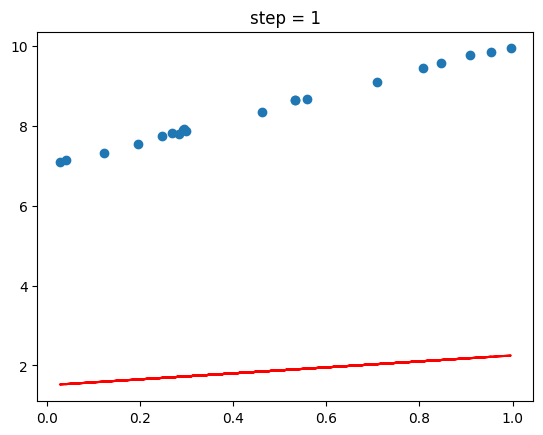

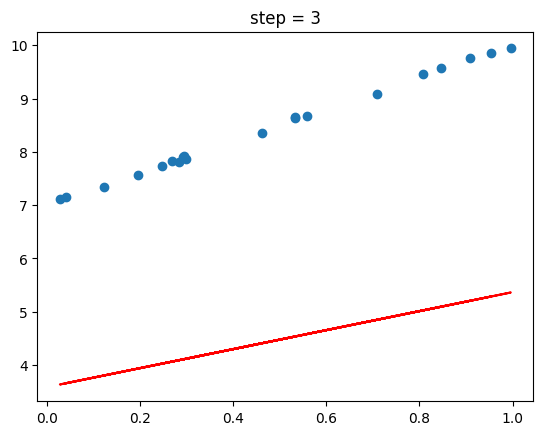

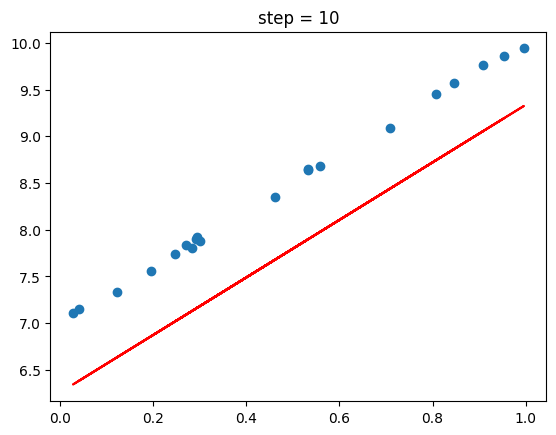

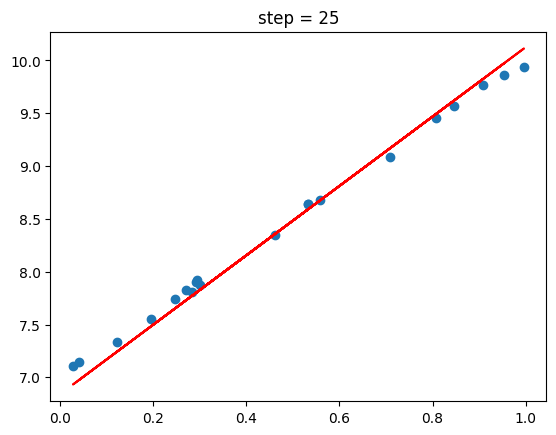

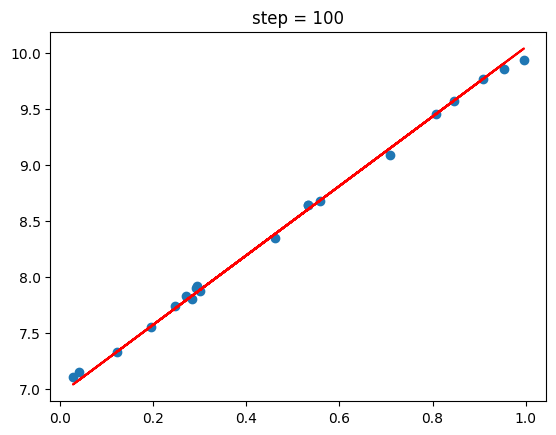

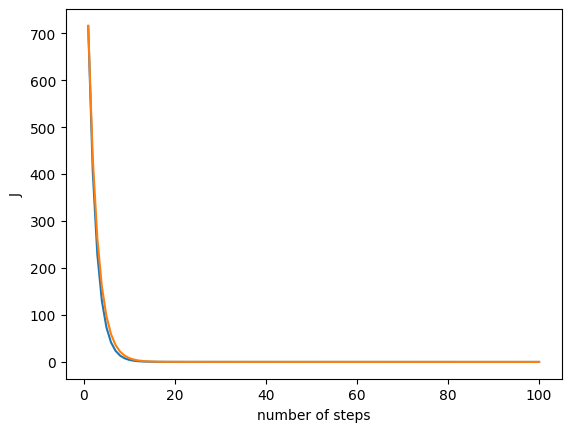

In [5]:
theta = np.array([0,0])
J_stochastic = []

for step in steps:
    h = X @ theta
    J_stochastic.append((h - y) @ (h - y) / 2)
    for i in range(m):
        h_i = X[i] @ theta
        gradient = (h_i - y[i]) * X[i]
        theta = theta - alpha * gradient
        # potentially plot 
    if step in plot_steps:
        plt.scatter(x,y)
        y_predict = X @ theta
        plt.plot(x, y_predict,'r')
        plt.title('step = ' + str(step))
        plt.show()

plt.plot(steps, J)
plt.plot(steps, J_stochastic)
plt.xlabel('number of steps')
plt.ylabel('J')
plt.show()